In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Obesity Classification.csv to Obesity Classification (1).csv


In [ ]:
obesity_df = pd.read_csv('/content/Obesity Classification.csv')

In [ ]:
#Check for missing values
missing_values = obesity_df.isnull().sum()

In [ ]:
#Remove Duplicates
obesity_df = obesity_df.drop_duplicates()

In [ ]:
#Correct Data Types
obesity_df.dtypes

ID          int64
Age         int64
Gender     object
Height      int64
Weight      int64
BMI       float64
Label      object
dtype: object

In [ ]:
#Address Outliers
# Identify outliers using IQR or Z-score
# For example, using IQR for the BMI column
Q1 = obesity_df['BMI'].quantile(0.25)
Q3 = obesity_df['BMI'].quantile(0.75)
IQR = Q3 - Q1

# Filter out outliers
outliers = obesity_df[(obesity_df['BMI'] < (Q1 - 1.5 * IQR)) | (obesity_df['BMI'] > (Q3 + 1.5 * IQR))]
obesity_df = obesity_df[~obesity_df.isin(outliers)].dropna()
obesity_df


,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175,80,25.3,Normal Weight
1,2,30,Female,160,60,22.5,Normal Weight
2,3,35,Male,180,90,27.3,Overweight
3,4,40,Female,150,50,20.0,Underweight
4,5,45,Male,190,100,31.2,Obese
...,...,...,...,...,...,...,...
103,106,11,Male,175,10,3.9,Underweight
104,107,16,Female,160,10,3.9,Underweight
105,108,21,Male,180,15,5.6,Underweight
106,109,26,Female,150,15,5.6,Underweight


Perform Exploratory Data Analysis (EDA)
Visualizations:
1.	Histogram of Age:
Shows the distribution of ages in the dataset.
2.	Bar Chart of Gender Distribution:
Compares the count of males and females.
3.	Box Plot of BMI by Gender:
Displays the BMI distribution for males and females.
4.	Scatter Plot of Height vs. Weight:
Shows the relationship between height and weight.
5.	Heatmap of Correlations:
Displays the correlations between numerical variables.
Let's create these visualizations and analyze them:


1. Histogram of Age:

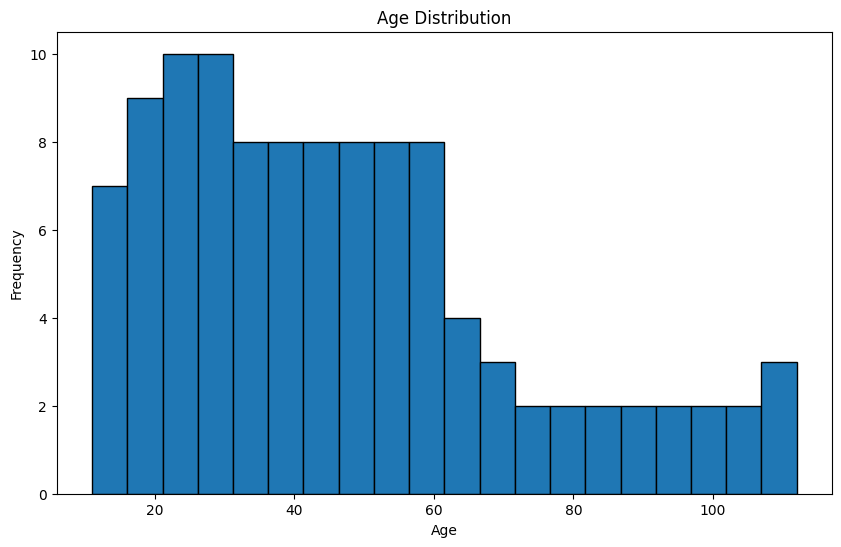

In [ ]:
# Histogram of Age
plt.figure(figsize=(10, 6))
plt.hist(obesity_df['Age'], bins=20, edgecolor='k')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


2. Bar Chart of Gender Distribution:

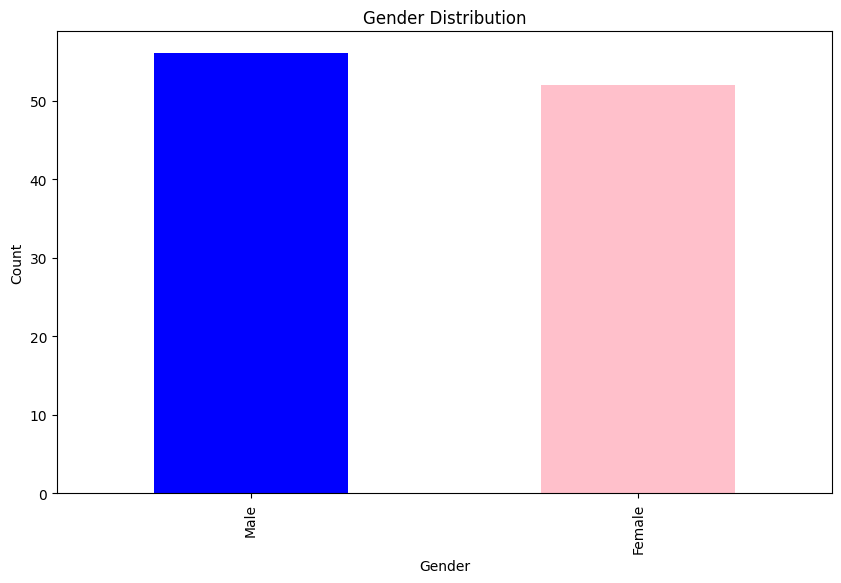

In [ ]:
# Bar Chart of Gender Distribution
gender_counts = obesity_df['Gender'].value_counts()
plt.figure(figsize=(10, 6))
gender_counts.plot(kind='bar', color=['blue', 'pink'])
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


3. Box Plot of BMI by Gender:

<Figure size 1000x600 with 0 Axes>

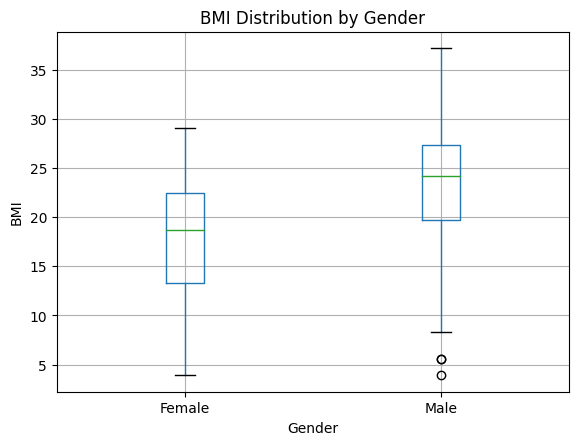

In [ ]:
# Box Plot of BMI by Gender
plt.figure(figsize=(10, 6))
obesity_df.boxplot(column='BMI', by='Gender')
plt.title('BMI Distribution by Gender')
plt.suptitle('')
plt.xlabel('Gender')
plt.ylabel('BMI')
plt.show()


4. Scatter Plot of Height vs. Weight:

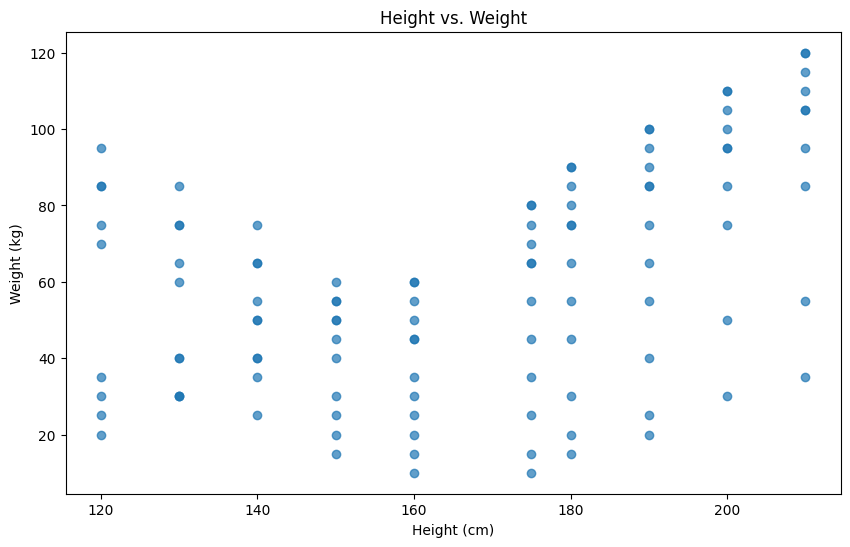

In [ ]:
# Scatter Plot of Height vs. Weight
plt.figure(figsize=(10, 6))
plt.scatter(obesity_df['Height'], obesity_df['Weight'], alpha=0.7)
plt.title('Height vs. Weight')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

# The attached diagram is a scatter plot depicting the relationship between height (in centimeters) and weight (in kilograms). Here are the key points about this scatter plot:

#Axes:

#The x-axis represents the height in centimeters (cm).
#The y-axis represents the weight in kilograms (kg).
#Data Points:

#Each point on the plot represents an individual data sample with a specific height and weight.
#The distribution of the points shows how weight varies with height.
#Trends:

#There is a noticeable pattern indicating that as height increases, weight tends to increase as well. This is evident from the upward trend in the scatter of points.
#However, the relationship is not perfectly linear, meaning there is some variability in weight for individuals of the same height.
#Variability:

#At shorter heights (e.g., around 120 cm to 160 cm), there is a wider range of weights, indicating more variability.
#At taller heights (e.g., around 180 cm to 200 cm), there is also variability in weight, but the general trend of increasing weight with height remains consistent.
#The scatter plot effectively visualizes the correlation between height and weight, allowing one to observe how these two variables are related.

5. Heatmap of Correlations:

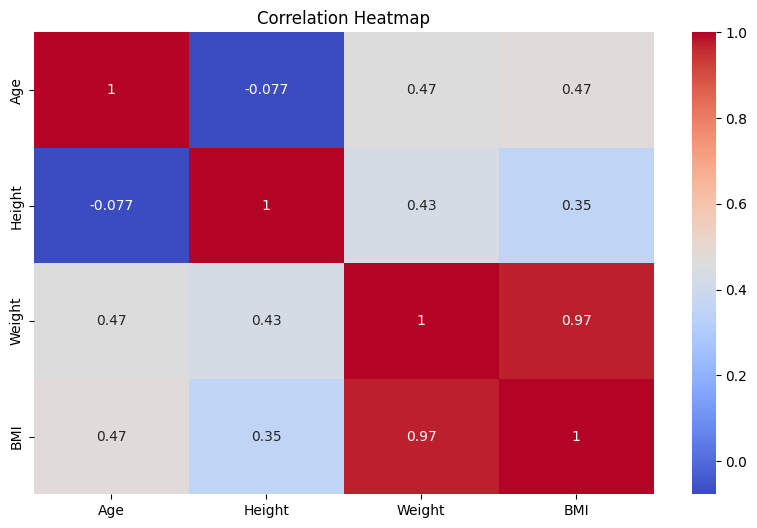

In [ ]:
# Heatmap of Correlations


# Dropping non-numeric columns for correlation calculation
numeric_df = obesity_df.drop(columns=['ID', 'Gender', 'Label'])

# Heatmap of Correlations
plt.figure(figsize=(10, 6))
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


#The heatmap shows the correlation between different numeric variables in the obesity dataset:

#Age: Shows weak correlations with other variables.
#Height: Shows a moderate positive correlation with weight (0.43) and BMI (0.35).
#Weight: Shows a strong positive correlation with BMI (0.97) and a moderate correlation with height (0.43).
#BMI: Shows a strong positive correlation with weight (0.97) and a moderate correlation with height (0.35).
#The color intensity represents the strength of the correlation, with darker red indicating a stronger positive correlation and darker blue indicating a stronger negative correlation.



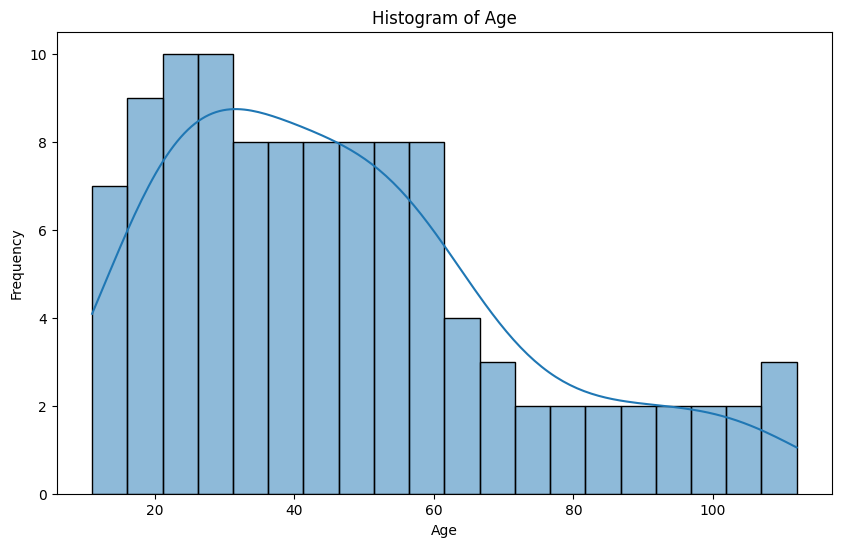

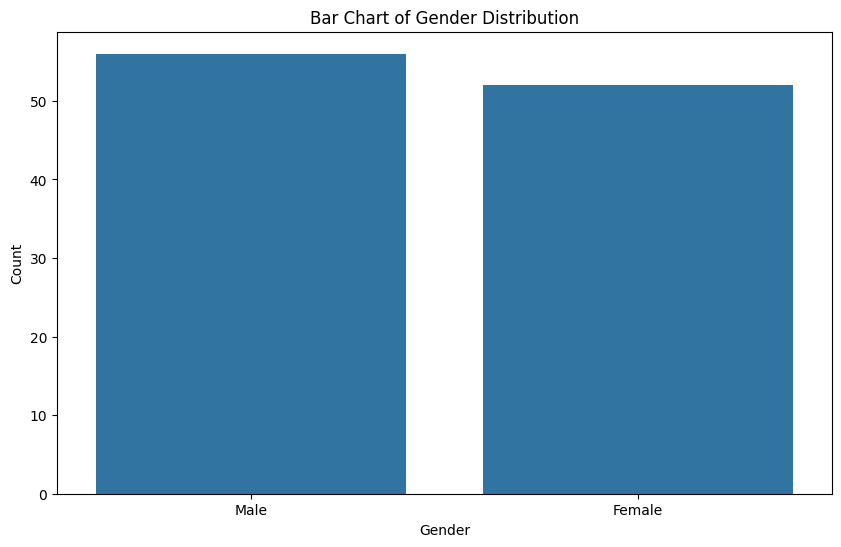

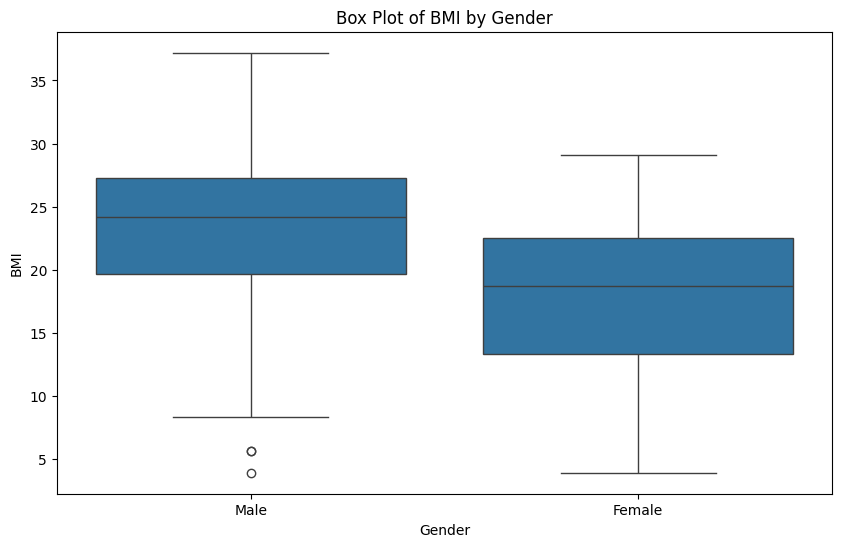

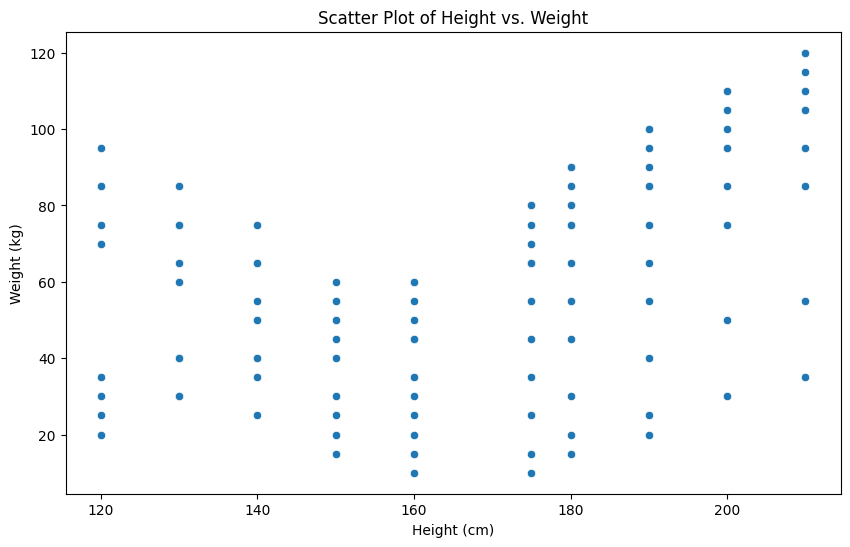

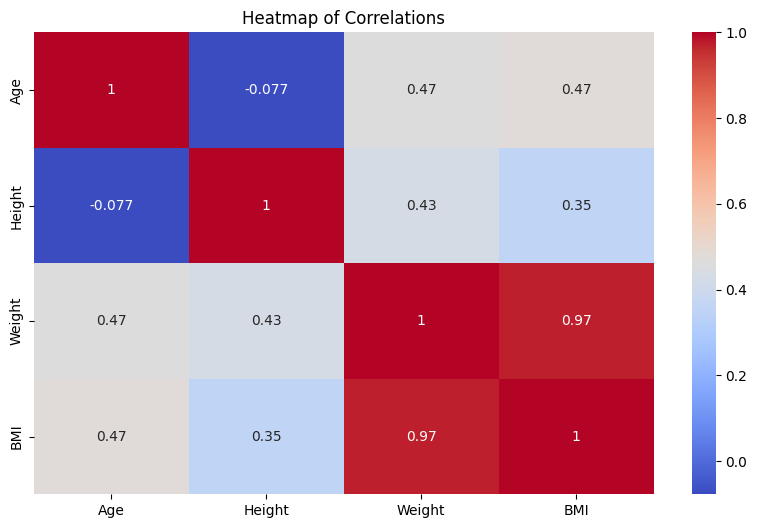

In [ ]:
# 1. Histogram of Age
plt.figure(figsize=(10, 6))
sns.histplot(obesity_df['Age'], bins=20, kde=True)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# 2. Bar Chart of Gender Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', data=obesity_df)
plt.title('Bar Chart of Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# 3. Box Plot of BMI by Gender
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='BMI', data=obesity_df)
plt.title('Box Plot of BMI by Gender')
plt.xlabel('Gender')
plt.ylabel('BMI')
plt.show()

# 4. Scatter Plot of Height vs. Weight
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Height', y='Weight', data=obesity_df)
plt.title('Scatter Plot of Height vs. Weight')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

# 5. Heatmap of Correlations
plt.figure(figsize=(10, 6))
numeric_df = obesity_df.drop(columns=['ID', 'Gender', 'Label'])
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlations')
plt.show()
